# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"
### LGMVIP August -22
## AUTHOR - Nipun Jain
### Intermediate Level Task
### TASK-6- Prediction using Decision Tree Algorithm :
#### Creating the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Dataset link : https://bit.ly/3kXTdox

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Loading Dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print(df.shape)

(150, 6)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
print(df.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [7]:
print(df['Species'].value_counts())

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64


### Data Visualization

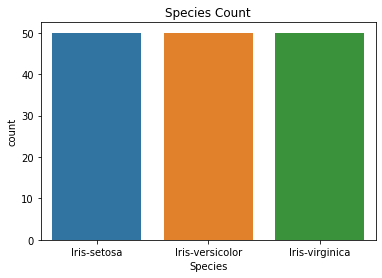

In [8]:
plt.title('Species Count')
sns.countplot(x = df['Species'], data = df)
plt.show()

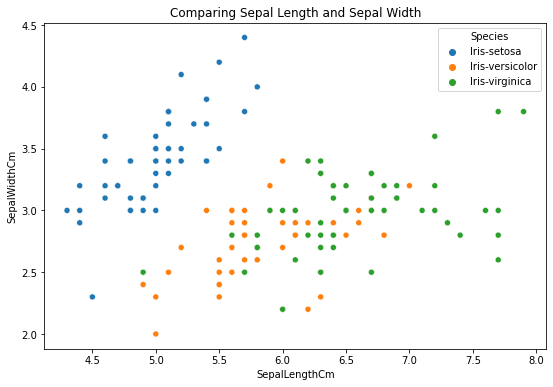

In [9]:
plt.figure(figsize = (9, 6))
plt.title('Comparing Sepal Length and Sepal Width')
sns.scatterplot(x = df['SepalLengthCm'],y = df['SepalWidthCm'], hue = df['Species'],)
plt.show()

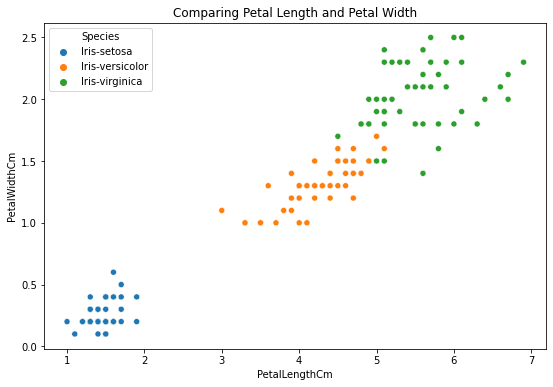

In [10]:
plt.figure(figsize = (9, 6))
plt.title('Comparing Petal Length and Petal Width')
sns.scatterplot(x = df['PetalLengthCm'],y = df['PetalWidthCm'], hue = df['Species'],)
plt.show()

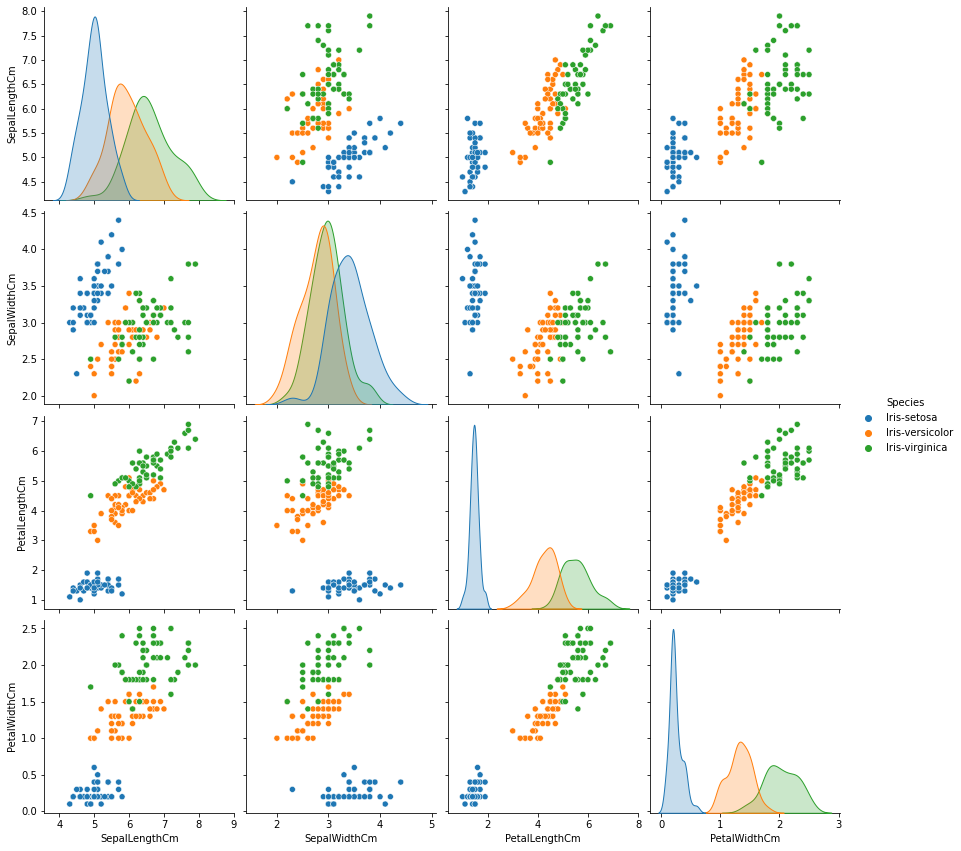

In [11]:
sns.pairplot(df.drop(['Id'], axis = 1), hue = 'Species', height = 3)

In [12]:
df = df.drop(['Id'], axis = 1)
print(df.shape)

(150, 5)


[]

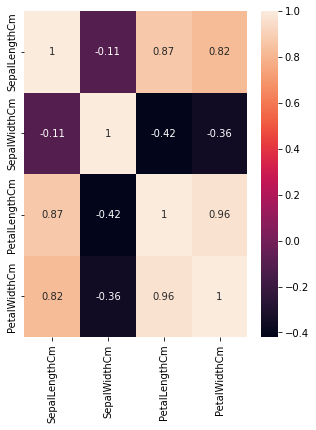

In [13]:
plt.figure(figsize = (5,6))
sns.heatmap(df.corr(), annot = True)
plt.plot()

### Splitting the dataset into training and test data

In [14]:
X = df.drop(["Species"], axis = 1)
Y = df['Species']
print(X.shape, Y.shape)

(150, 4) (150,)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [16]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [17]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [18]:
y_train.head()

22        Iris-setosa
15        Iris-setosa
65    Iris-versicolor
11        Iris-setosa
42        Iris-setosa
Name: Species, dtype: object

In [19]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Building and Training Model

In [20]:
model_DT = DecisionTreeClassifier()
model_DT.fit(x_train, y_train)

DecisionTreeClassifier()

### Visualizing the decision tree

[Text(274.7076923076923, 605.7257142857143, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = Iris-versicolor'),
 Text(206.03076923076924, 512.537142857143, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Iris-setosa'),
 Text(343.38461538461536, 512.537142857143, 'PetalLengthCm <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = Iris-versicolor'),
 Text(137.35384615384615, 419.34857142857146, 'PetalWidthCm <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = Iris-versicolor'),
 Text(68.67692307692307, 326.16, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = Iris-versicolor'),
 Text(206.03076923076924, 326.16, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(549.4153846153846, 419.34857142857146, 'PetalWidthCm <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = Iris-virginica'),
 Text(343.38461538461536, 326.16, 'PetalLengthCm <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]

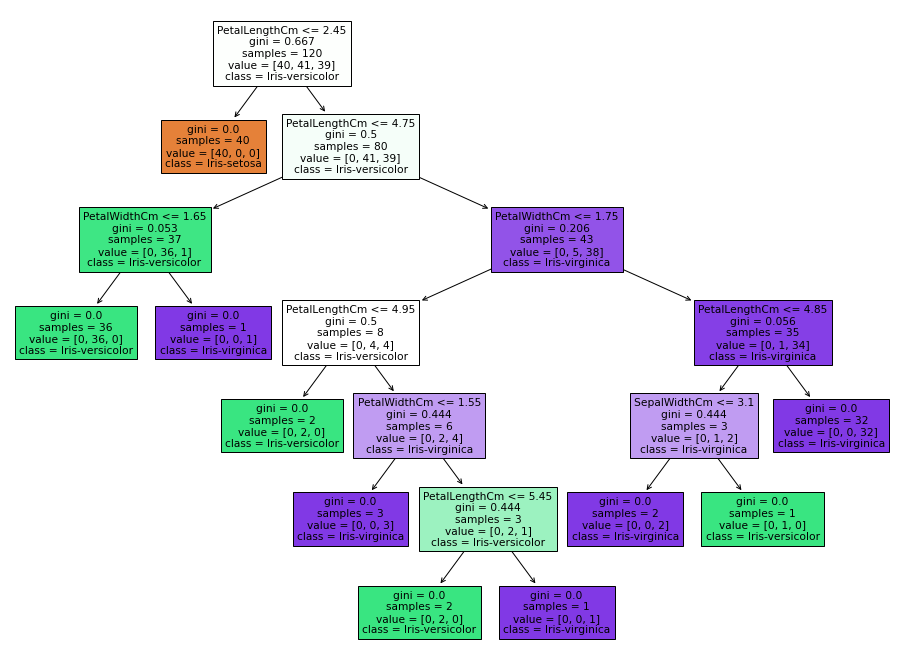

In [21]:
plt.figure(figsize = (16, 12))
tree.plot_tree(model_DT, filled = True, feature_names = df.columns.values, class_names = df['Species'].unique())

### Prediction on test data

In [22]:
y_pred = model_DT.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

### Checking Accuracy

In [23]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [24]:
print("The accuracy of the Decision Tree is ", round(accuracy_score(y_test, y_pred)*100,2), "%")

The accuracy of the Decision Tree is  100.0 %


In [25]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

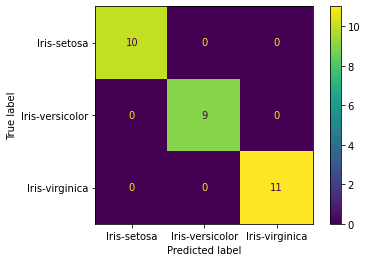

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_DT, x_test, y_test)  
plt.show()